# Graph Learning

## Lab 7: Graph Neural Networks

In this lab, you will learn to classify nodes using a graph neural network (GNN).

## Import

In [87]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

In [88]:
from sknetwork.classification import get_accuracy_score
from sknetwork.data import load_netset
from sknetwork.embedding import Spectral
from sknetwork.gnn import GNNClassifier
from sknetwork.utils import directed2undirected

from sklearn.manifold import TSNE

## Data

We will work on the following datasets (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Cora (directed graph + bipartite graph)
* WikiVitals (directed graph + bipartite graph)

Both datasets are graphs with node features (given by the bipartite graph) and ground-truth labels.

In [89]:
cora = load_netset('cora')
wikivitals = load_netset('wikivitals')

Parsing files...
Done.
Parsing files...
Done.


In [90]:
def visualize_embedding(embedding, labels, size=(6,6)):
    """Visualize embedding in 2 dimensions using TSNE. """
    print("Computing TSNE...")
    tsne = TSNE(random_state=8).fit_transform(embedding)
    fig, ax = plt.subplots(1, 1, figsize=size)
    plt.scatter(tsne[:, 0], tsne[:, 1], c=labels, s=50, cmap='hsv')
    plt.xticks([])
    plt.yticks([])
    plt.show()

## 1. Cora

We start with the Cora dataset. We check the embedding of the nodes before and after learning, and the impact of the GNN architecture on accuracy.

In [91]:
dataset = cora

In [92]:
adjacency = dataset.adjacency
features = dataset.biadjacency
labels_true = dataset.labels

In [93]:
# we use undirected graphs
adjacency = directed2undirected(adjacency)

## To do

Consider a GNN with a single hidden layer of dimension 16.

* Run a single forward pass on the data, without learning.
* Display the embedding provided by the hidden layer.

In [94]:
hidden_dim = 16

In [95]:
n_labels = len(set(labels_true))

In [96]:
gnn = GNNClassifier(dims=[hidden_dim, n_labels], verbose=True)

In [97]:
gnn

GNNClassifier(
    Convolution(layer_type: conv, out_channels: 16, activation: ReLu, use_bias: True, normalization: both, self_embeddings: True)
    Convolution(layer_type: conv, out_channels: 7, activation: Cross entropy, use_bias: True, normalization: both, self_embeddings: True)
)

In [98]:
output = gnn.forward(adjacency, features)

In [99]:
embedding = gnn.layers[0].embedding

Computing TSNE...


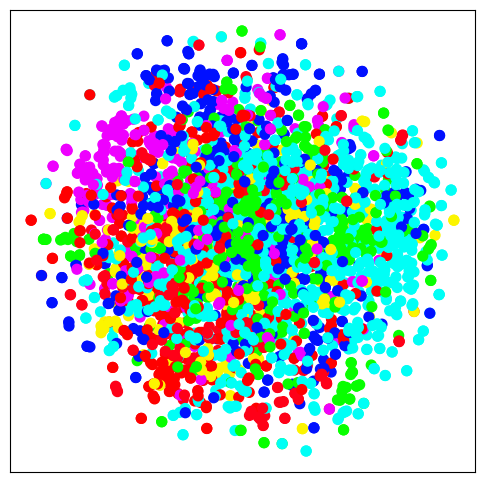

In [100]:
visualize_embedding(embedding, labels_true)

## To do

We now train the GNN.

* Train the GNN with 50% / 50% train / test split.
* Give the accuracy of the classification on the train and test sets. 
* Give the total number of parameters.
* Display the embedding provided by the hidden layer.

In [101]:
# train / test split
train_ratio = 0.5
labels = labels_true.copy()
train_mask = np.random.random(size=len(labels)) < train_ratio
test_mask = ~train_mask
labels[test_mask] = -1

In [102]:
gnn.fit(adjacency, features, labels)

In epoch   0, loss: 1.998, train accuracy: 0.128
In epoch  10, loss: 1.672, train accuracy: 0.547
In epoch  20, loss: 1.465, train accuracy: 0.827
In epoch  30, loss: 1.313, train accuracy: 0.920
In epoch  40, loss: 1.246, train accuracy: 0.956
In epoch  50, loss: 1.215, train accuracy: 0.970
In epoch  60, loss: 1.199, train accuracy: 0.982
In epoch  70, loss: 1.190, train accuracy: 0.986
In epoch  80, loss: 1.184, train accuracy: 0.990
In epoch  90, loss: 1.179, train accuracy: 0.993


GNNClassifier(
    Convolution(layer_type: conv, out_channels: 16, activation: ReLu, use_bias: True, normalization: both, self_embeddings: True)
    Convolution(layer_type: conv, out_channels: 7, activation: Cross entropy, use_bias: True, normalization: both, self_embeddings: True)
)

In [103]:
labels_pred = gnn.predict()

In [104]:
# accuracy on train and test sets
train_acc = get_accuracy_score(labels_true[train_mask], labels_pred[train_mask]) 
test_acc = get_accuracy_score(labels_true[test_mask], labels_pred[test_mask])
print(f'Train accuracy: {train_acc:.3f}')
print(f'Test accuracy: {test_acc:.3f}')

Train accuracy: 0.995
Test accuracy: 0.826


Computing TSNE...


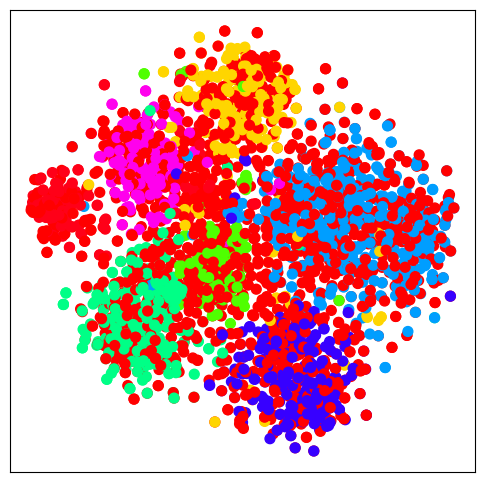

In [105]:
# display embedding from hidden layer
embedding = gnn.layers[0].embedding
visualize_embedding(embedding, labels)

## To do

* Retrain the GNN with an empty graph.
* Compare the accuracy of the classification with that of the previous model. 
* Comment the results. <br>What is the learning model?

In [106]:
empty = sparse.csr_matrix(adjacency.shape)

In [107]:
# retrain on empty 
gnn.fit(empty, features, labels)

In epoch   0, loss: 1.378, train accuracy: 0.858
In epoch  10, loss: 1.233, train accuracy: 0.979
In epoch  20, loss: 1.193, train accuracy: 0.998
In epoch  30, loss: 1.180, train accuracy: 0.999
In epoch  40, loss: 1.175, train accuracy: 0.999
In epoch  50, loss: 1.172, train accuracy: 0.999
In epoch  60, loss: 1.171, train accuracy: 0.999
In epoch  70, loss: 1.170, train accuracy: 0.999
In epoch  80, loss: 1.169, train accuracy: 1.000
In epoch  90, loss: 1.169, train accuracy: 1.000


GNNClassifier(
    Convolution(layer_type: conv, out_channels: 16, activation: ReLu, use_bias: True, normalization: both, self_embeddings: True)
    Convolution(layer_type: conv, out_channels: 7, activation: Cross entropy, use_bias: True, normalization: both, self_embeddings: True)
)

In [108]:
labels_pred = gnn.predict()

In [109]:
train_acc_empty = get_accuracy_score(labels_true[train_mask], labels_pred[train_mask])
test_acc_empty = get_accuracy_score(labels_true[test_mask], labels_pred[test_mask])

print(f'Train accuracy')
print(f'On empty: {train_acc_empty:.3f} \t On full: {train_acc:.3f}')

print(f'Test accuracy')
print(f'On empty: {test_acc_empty:.3f} \t On full: {test_acc:.3f}')

Train accuracy
On empty: 1.000 	 On full: 0.995
Test accuracy
On empty: 0.657 	 On full: 0.826


**Answer**: 

## To do

We now consider a hidden layer of dimension 32.

* Retrain the GNN (with the graph).
* Give the accuracy of the classification and the number of parameters.
* Comment the results.

In [ ]:
# changing dimension
hidden_dim_32 = 32
gnn_32 = GNNClassifier(dims=[hidden_dim_32, n_labels], verbose=True)
gnn_32

GNNClassifier(
    Convolution(layer_type: conv, out_channels: 32, activation: ReLu, use_bias: True, normalization: both, self_embeddings: True)
    Convolution(layer_type: conv, out_channels: 7, activation: Cross entropy, use_bias: True, normalization: both, self_embeddings: True)
)

Computing TSNE...


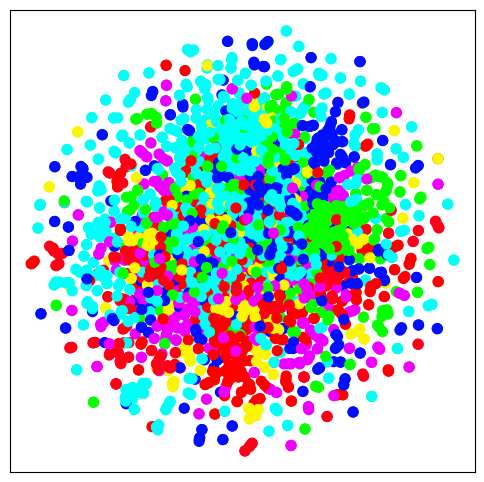

In [111]:
output_32 = gnn_32.forward(adjacency, features)
embedding_32 = gnn_32.layers[0].embedding
visualize_embedding(embedding_32, labels_true)

In [112]:
# training
gnn_32.fit(adjacency, features, labels)

In epoch   0, loss: 1.956, train accuracy: 0.173
In epoch  10, loss: 1.366, train accuracy: 0.877
In epoch  20, loss: 1.227, train accuracy: 0.971
In epoch  30, loss: 1.192, train accuracy: 0.987
In epoch  40, loss: 1.180, train accuracy: 0.993
In epoch  50, loss: 1.174, train accuracy: 0.997
In epoch  60, loss: 1.171, train accuracy: 0.999
In epoch  70, loss: 1.170, train accuracy: 0.999
In epoch  80, loss: 1.169, train accuracy: 0.999
In epoch  90, loss: 1.168, train accuracy: 0.999


GNNClassifier(
    Convolution(layer_type: conv, out_channels: 32, activation: ReLu, use_bias: True, normalization: both, self_embeddings: True)
    Convolution(layer_type: conv, out_channels: 7, activation: Cross entropy, use_bias: True, normalization: both, self_embeddings: True)
)

In [113]:
labels_pred_32 = gnn_32.predict()

In [114]:
train_acc_32 = get_accuracy_score(labels_true[train_mask], labels_pred_32[train_mask]) 
test_acc_32 = get_accuracy_score(labels_true[test_mask], labels_pred_32[test_mask])
# print(f'Train accuracy: {train_acc_32:.3f}')
# print(f'Test accuracy: {test_acc_32:.3f}')

print(f'Train accuracy')
print(f'16: {train_acc:.3f} \t32: {train_acc_32:.3f}')

print(f'Test accuracy')
print(f'16: {test_acc:.3f} \t32: {test_acc_32:.3f}')

Train accuracy
16: 0.995 	32: 0.999
Test accuracy
16: 0.826 	32: 0.818


## To do

Finally , we take 2 hidden layers, each of dimension 16.

* Retrain the GNN.
* Give the accuracy of the classification and the number of parameters.
* Comment the results.

In [115]:
# 2 hidden layers of dim 16
gnn_2 = GNNClassifier(dims=[hidden_dim, hidden_dim, n_labels], verbose=True)
gnn_2


GNNClassifier(
    Convolution(layer_type: conv, out_channels: 16, activation: ReLu, use_bias: True, normalization: both, self_embeddings: True)
    Convolution(layer_type: conv, out_channels: 16, activation: ReLu, use_bias: True, normalization: both, self_embeddings: True)
    Convolution(layer_type: conv, out_channels: 7, activation: Cross entropy, use_bias: True, normalization: both, self_embeddings: True)
)

Computing TSNE...


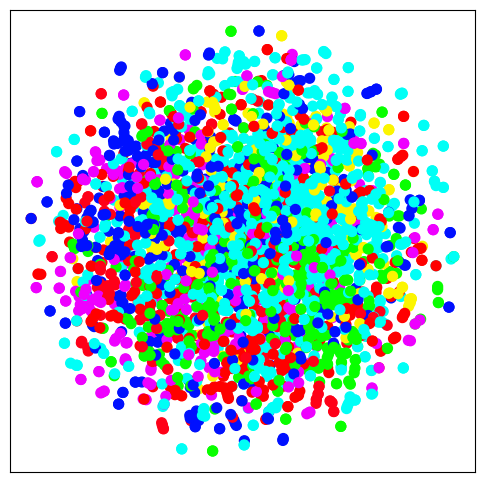

In [116]:
output_2 = gnn_2.forward(adjacency, features)
embedding_2 = gnn_2.layers[0].embedding
visualize_embedding(embedding_2, labels_true)

In [117]:
# training
gnn_2.fit(adjacency, features, labels)

In epoch   0, loss: 2.003, train accuracy: 0.139
In epoch  10, loss: 1.690, train accuracy: 0.537
In epoch  20, loss: 1.552, train accuracy: 0.787
In epoch  30, loss: 1.371, train accuracy: 0.883
In epoch  40, loss: 1.275, train accuracy: 0.934
In epoch  50, loss: 1.229, train accuracy: 0.962
In epoch  60, loss: 1.208, train accuracy: 0.978
In epoch  70, loss: 1.194, train accuracy: 0.985
In epoch  80, loss: 1.187, train accuracy: 0.988
In epoch  90, loss: 1.182, train accuracy: 0.993


GNNClassifier(
    Convolution(layer_type: conv, out_channels: 16, activation: ReLu, use_bias: True, normalization: both, self_embeddings: True)
    Convolution(layer_type: conv, out_channels: 16, activation: ReLu, use_bias: True, normalization: both, self_embeddings: True)
    Convolution(layer_type: conv, out_channels: 7, activation: Cross entropy, use_bias: True, normalization: both, self_embeddings: True)
)

In [118]:
labels_pred_2 = gnn_2.predict()

In [119]:
train_acc_2 = get_accuracy_score(labels_true[train_mask], labels_pred_2[train_mask])
test_acc_2 = get_accuracy_score(labels_true[test_mask], labels_pred_2[test_mask])

print(f'Train accuracy')
print(f'16: {train_acc:.3f} \t32: {train_acc_2:.3f}')

print(f'Test accuracy')
print(f'16: {test_acc:.3f} \t32: {test_acc_2:.3f}')

Train accuracy
16: 0.995 	32: 0.993
Test accuracy
16: 0.826 	32: 0.839


## 2. Wikivitals

We now focus on Wikivitals. We take the spectral embedding of the article-word bipartite graph as features.

In [ ]:
dataset = wikivitals

In [ ]:
adjacency = dataset.adjacency
biadjacency = dataset.biadjacency
names = dataset.names
labels_true = dataset.labels
names_labels = dataset.names_labels

In [ ]:
# we consider the graph as undirected
adjacency = directed2undirected(adjacency)

In [ ]:
# we use the spectral embedding of the bipartite graph as features
spectral = Spectral(20)
features = spectral.fit_transform(biadjacency)

## To do

We consider a GNN with a single hidden layer of dimension 16.
* Train the GNN with 50% / 50% train / test split.
* Give the accuracy of the classification.
* Display the confusion matrix of the test set.
* Give for each label the 5 articles of the test set classified with the highest confidence.

In [ ]:
n_labels = len(set(labels_true))

In [ ]:
gnn = GNNClassifier(dims=[hidden_dim, n_labels], verbose=True)

## To do

Compare the results with those obtained with:
* Heat diffusion on the graph.
* Logistic regression on the features.